<a href="https://colab.research.google.com/github/JiaminJIAN/Research/blob/master/Platoon%20control/Platoon_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Platoon control**

### **Introduction**

For $i = 0$, the state of the system governed by

\begin{cases}
    d P_{0}(t) = V_{0}(t) \, d t + \sigma_{1} \, d W_{1}(t) \\
    d V_{0}(t) = u_{0}(t) \, d t + \sigma_{2} \, d W_{2}(t)
\end{cases}

where $W_{1}(t)$ and $W_{2}(t)$ are standard Brownian motions and they are independent of each other.

Since we got the optimal control

$$u_{0}^{*}(x, t) = - \varphi (T - t) (x_{0,2} - \nu),$$

where 

$$\varphi(t) = \frac{e^{2t} - 1}{e^{2t} + 1}.$$

By the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{0}((i+1)h) = P_{0}(ih) + V_{0}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{0}((i+1)h) = V_{0}(ih) - \varphi(T - ih) (V_{0}(ih) - \nu) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import plt

In [2]:
## Parameters

P0_0 = 1       # the initial position of vehicle 0
V0_0 = 20      # the initial velocity of vehicle 0
nu = 70        # the value of \nu
sigma_1 = 1    # the defussion term 1
sigma_2 = 1    # the defussion term 2
T = 3          # terminal time
N = 100        # nodes of time interval

In [3]:
## the function \varphi(t)

def varphi(t):
  value = (np.exp(2*t) - 1) / (np.exp(2*t) + 1)
  return value

In [4]:
## the position and velocity of vehicle 0 by the Euler method

def path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P0 = P0_0 + np.zeros(N+1)  
    V0 = V0_0 + np.zeros(N+1)            
    for i in range(N):
        V0[i+1] = V0[i] - varphi(T-i*h) * (V0[i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P0[i+1] = P0[i] + V0[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V0, P0

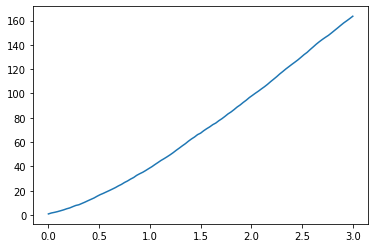

In [5]:
## the position of vehicle 0

[t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P0)

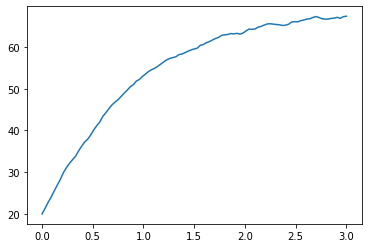

In [6]:
## the velocity of vehicle 0

plt.plot(t,V0)

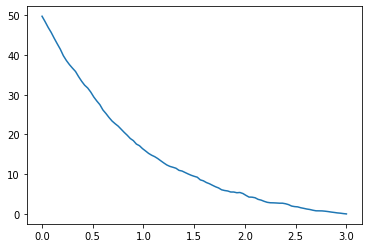

In [7]:
## the optimal control(acceleration) of vehicle 0

u = - varphi(T-t) * (V0 - nu)
plt.plot(t,u)

When $N=1$, there are two vehicles in the platoon system. We suppose the optimal strategy of the second vehicle is 

$$u_{1}^{*} (x, t) = - \varphi (T - t) (x_{1,2} - x_{0,2})$$

Similarly, by the Euler method, we devide the time interval $[0, T]$ into $N$ segments and set $h = \frac{T}{N}$, then we have

\begin{cases}
    P_{1}((i+1)h) = P_{1}(ih) + V_{1}(ih) h + \sigma_{1} \sqrt{h} Z_{i} \\
    V_{1}((i+1)h) = V_{1}(ih) - \varphi(T - ih) (V_{1}(ih) - V_{0}(ih)) h + \sigma_{2} \sqrt{h} X_{i}
\end{cases}

where $i = 0, 1, \dots, N-1$ and ${X}_{i}, Z_{i}$ are independent standard normal variables.

In [8]:
## the position and velocity of vehicle 1 by the Euler method

def path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N):
    t = np.linspace(0, T, num = N+1)
    h = T/N  
    P1 = P1_0 + np.zeros(N+1)  
    V1 = V1_0 + np.zeros(N+1)
    [t, V0, P0] = path_n0(P0_0, V0_0, nu, sigma_1, sigma_2, T, N)            
    for i in range(N):
        V1[i+1] = V1[i] - varphi(T-i*h) * (V1[i] - V0[i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        P1[i+1] = P1[i] + V1[i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return t, V1, P1

In [9]:
## Parameters

P1_0 = 0       # the initial position of vehicle 1
V1_0 = 20      # the initial velocity of vehicle 1

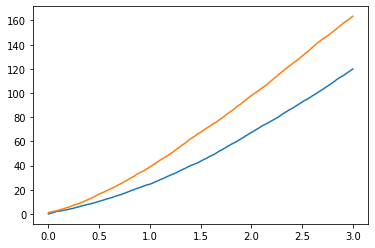

In [10]:
## the position of vehicle 0 and vehicle 1

[t, V1, P1] = path_n1(P1_0, V1_0, P0_0, V0_0, nu, sigma_1, sigma_2, T, N)
plt.plot(t,P1)
plt.plot(t,P0)

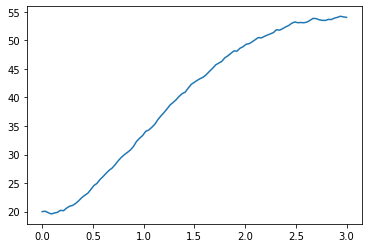

In [11]:
## the velocity of vehicle 0

plt.plot(t,V1)

In [12]:
## the velocity matrix of M vehicles

def velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M):
    t = np.linspace(0, T, num = N+1)
    h = T/N
    V = np.zeros([M, N+1])
    V[:,0] = v  # initial velocity of M vehicles
    for i in range(N):
        V[0,i+1] = V[0,i] - varphi(T-i*h) * (V[0,i] - nu) * h + sigma_2 * np.sqrt(h) * np.random.normal()
        for j in range(1, M):
            V[j,i+1] = V[j,i] - varphi(T-i*h) * (V[j,i] - V[j-1,i]) * h + sigma_2 * np.sqrt(h) * np.random.normal()
    return V

In [13]:
## Parameters

M = 10
v = np.zeros(M, order = 'F') + 20

V = velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M)

print(V)

[[20.         21.56403254 22.97043038 ... 63.85788595 63.92541042
  63.69088451]
 [20.         19.81706134 20.13887216 ... 54.00501669 53.67593283
  53.71603358]
 [20.         20.02027097 20.38484297 ... 39.69975321 39.92652041
  40.02939301]
 ...
 [20.         19.58538018 19.55921529 ... 20.67458657 20.7213815
  21.11442032]
 [20.         20.02066792 19.80795533 ... 19.45694958 19.66949139
  19.56847675]
 [20.         20.08083664 19.9261982  ... 19.81030259 19.96972237
  20.10828471]]


In [14]:
## the position matrix of M vehicles

def position_matrix(p, v, nu, sigma_1, sigma_2, T, N, M):
    t = np.linspace(0, T, num = N+1)
    h = T/N
    V = velocity_matrix(v, nu, sigma_1, sigma_2, T, N, M)
    P = np.zeros([M, N+1])
    P[:,0] =p
    for j in range(M):
        for i in range(N):
            P[j,i+1] = P[j,i] + V[j,i] * h + sigma_1 * np.sqrt(h) * np.random.normal()
    return P

In [15]:
## parameters

p = np.arange(10, 0, -1)
P = position_matrix(p, v, nu, sigma_1, sigma_2, T, N, M)
print(P)

[[ 10.          10.30153538  10.7819185  ... 163.4844318  165.24655514
  167.04787882]
 [  9.           9.3557035    9.72552445 ... 122.94200485 124.42946491
  125.92858562]
 [  8.           8.55922402   9.0207589  ...  93.61384237  94.90854389
   96.21914709]
 ...
 [  3.           3.51212824   3.94057752 ...  63.65675338  64.04523297
   64.58532505]
 [  2.           2.62353694   3.01376042 ...  55.5448069   56.31114629
   56.96673736]
 [  1.           1.59902736   2.19118157 ...  56.52472819  57.30211209
   57.68676091]]


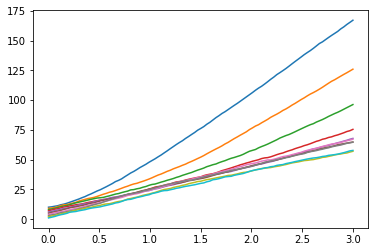

In [16]:
## the position of M vehicles

for i in range(10): 
    plt.plot(t,P[i])

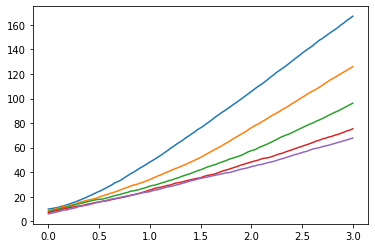

In [17]:
for i in range(5): 
    plt.plot(t,P[i])

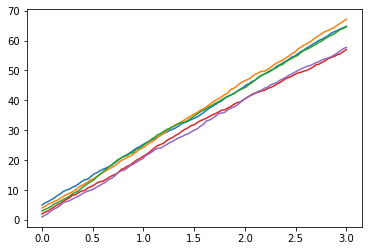

In [18]:
for i in range(5, 10): 
    plt.plot(t,P[i])